### refer : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True, )
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True, cache_dir='../../')

68616192/68606236 [==============================] - 5s 0us/step


In [3]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
PATH, train_dir, validation_dir

('../../datasets/cats_and_dogs_filtered',
 '../../datasets/cats_and_dogs_filtered/train',
 '../../datasets/cats_and_dogs_filtered/validation')

In [4]:
# train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# num_cats_tr = len(os.listdir(train_cats_dir))
# num_dogs_tr = len(os.listdir(train_dogs_dir))

# num_cats_val = len(os.listdir(validation_cats_dir))
# num_dogs_val = len(os.listdir(validation_dogs_dir))

# total_train = num_cats_tr + num_dogs_tr
# total_val = num_cats_val + num_dogs_val
batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest') # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

(128, 150, 150, 3)

In [19]:
model = tf.keras.models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [ ]:
# model = tf.keras.models.Sequential()
# model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
# model.add(Conv2D(32, (3, 3),)
# model.add(Activation(`relu`))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation(`relu`))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation(`relu`))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())  # 이전 CNN 레이어에서 나온 3차원 배열은 1차원으로 뽑아줍니다
# model.add(Dense(64))
# model.add(Activation(`relu`))
# model.add(Dropout(0.5))
# model.add(Dense(2))
# model.add(Activation(`sigmoid`))

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 64)      

In [21]:
epochs_size = 50

hist = model.fit(
    train_data_gen,
    batch_size=batch_size,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs= epochs_size,
    validation_data=val_data_gen,
    validation_steps= val_data_gen.samples // batch_size
)

Epoch 1/50


2022-01-05 13:31:15.595760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.7921 - accuracy: 0.5069

2022-01-05 13:31:23.823474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 10s 511ms/step - loss: 0.7921 - accuracy: 0.5069 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
15/15 [==============================] - 7s 481ms/step - loss: 0.6917 - accuracy: 0.4941 - val_loss: 0.6821 - val_accuracy: 0.5056
Epoch 3/50
15/15 [==============================] - 7s 475ms/step - loss: 0.6816 - accuracy: 0.5331 - val_loss: 0.6650 - val_accuracy: 0.5547
Epoch 4/50
15/15 [==============================] - 7s 486ms/step - loss: 0.6667 - accuracy: 0.5620 - val_loss: 0.6382 - val_accuracy: 0.5871
Epoch 5/50
15/15 [==============================] - 7s 476ms/step - loss: 0.6598 - accuracy: 0.5588 - val_loss: 0.6456 - val_accuracy: 0.5759
Epoch 6/50
15/15 [==============================] - 7s 478ms/step - loss: 0.6620 - accuracy: 0.5726 - val_loss: 0.7061 - val_accuracy: 0.6250
Epoch 7/50
15/15 [==============================] - 7s 479ms/step - loss: 0.6581 - accuracy: 0.5689 - val_loss: 0.6571 - val_accuracy: 0.6362
Epoch 8/50
15/15

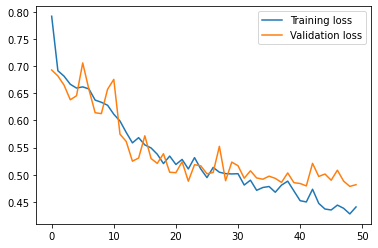

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.epoch, hist.history['loss'], label='Training loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

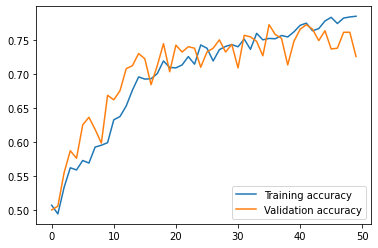

In [23]:
plt.plot(hist.epoch, hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

##Dropout

In [26]:
model_new = tf.keras.models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)       

In [37]:
hist_new = model_new.fit(
    train_data_gen,
    batch_size=128,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs= epochs_size,
    validation_data=val_data_gen,
    validation_steps= val_data_gen.samples // batch_size
)

# batch_size=64 --> loss: 0.3850 - accuracy: 0.8152 - val_loss: 0.4772 - val_accuracy: 0.7723
# batch_size=128 --> loss: 0.2832 - accuracy: 0.8702 - val_loss: 0.4906 - val_accuracy: 0.7868
# batch_size=256 --> loss: 0.3134 - accuracy: 0.8557 - val_loss: 0.5407 - val_accuracy: 0.7623

Epoch 1/50
15/15 [==============================] - 8s 508ms/step - loss: 0.3217 - accuracy: 0.8494 - val_loss: 0.5479 - val_accuracy: 0.7690
Epoch 2/50
15/15 [==============================] - 7s 487ms/step - loss: 0.3441 - accuracy: 0.8435 - val_loss: 0.5631 - val_accuracy: 0.7667
Epoch 3/50
15/15 [==============================] - 7s 480ms/step - loss: 0.3402 - accuracy: 0.8312 - val_loss: 0.5155 - val_accuracy: 0.7835
Epoch 4/50
15/15 [==============================] - 7s 485ms/step - loss: 0.3170 - accuracy: 0.8568 - val_loss: 0.5122 - val_accuracy: 0.7813
Epoch 5/50
15/15 [==============================] - 7s 484ms/step - loss: 0.3173 - accuracy: 0.8526 - val_loss: 0.5673 - val_accuracy: 0.7746
Epoch 6/50
15/15 [==============================] - 7s 479ms/step - loss: 0.2984 - accuracy: 0.8643 - val_loss: 0.5200 - val_accuracy: 0.7891
Epoch 7/50
15/15 [==============================] - 7s 483ms/step - loss: 0.3281 - accuracy: 0.8542 - val_loss: 0.5028 - val_accuracy: 0.7723
Epoch 

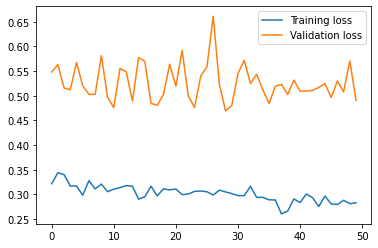

In [38]:
import matplotlib.pyplot as plt
plt.plot(hist_new.epoch, hist_new.history['loss'], label='Training loss')
plt.plot(hist_new.epoch, hist_new.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

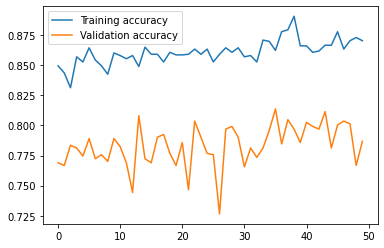

In [39]:
plt.plot(hist_new.epoch, hist_new.history['accuracy'], label='Training accuracy')
plt.plot(hist_new.epoch, hist_new.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()